The below code is used for generating the corpus from the words of course description. 

The code used below is referenced from the site

https://www.oreilly.com/learning/how-do-i-compare-document-similarity-using-python

https://radimrehurek.com/gensim/tut3.html



### import the libraries

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt 
import pandas as pd

%matplotlib inline 

In [4]:
import gensim
from nltk.tokenize import word_tokenize

### Read the dataset from the csv file into a pandas dataframe. 

In [5]:
dataset = pd.read_csv("data/trial_dataset.csv")

In [6]:
dataset.head()

,CourseId,CourseName,Description
0,IS202,Social Aspects Info Tech,\nThis course satisfies the General Education ...
1,IS390,Special Topics in Information Studies,"Explores cultural ideas about computers, inclu..."
2,IS403,iterature and Resources for Children,"\nEvaluation, selection and use of books and o..."
3,IS451,Introduction to Network Information Systems,Hands-on introduction to technology systems fo...
4,IS452,Foundations of Information Processing,"Covers common data, document processing, and p..."


The below code simply extract the data from description columns

These are the documents for us. 

For demo purpose used only the 2 rows. 

storing the course description into a list. 


In [41]:
cnt = 0 
text_list= []
for text in dataset["Description"]:
    print (text)
    text_list.append(text)
    cnt+=1
    if cnt > 2: 
        break


This course satisfies the General Education Criteria for a: Social & Beh Sci - Soc Sci
Explores cultural ideas about computers, including hopes and fears about the effects of computers on our lives. Will analyze images of computers in fiction and movies. The course will also examine hackers, online subcultures, and other computer-related subcultures, and the integration of computers into various cultural practices. 

Evaluation, selection and use of books and other resources for children (ages 0-14) in public libraries and school media centers; explores standard selection criteria for print and nonprint materials in all formats and develops the ability to evaluate and promote materials according to their various uses (personal and curricular) and according to children's various needs (intellectual, emotional, social and physical)


From the above text_list, 
break extract the words and store it in a list for each document. 


In [52]:
wordlist = []
for text in text_list:
    words =[]
    print(text)
    for word in word_tokenize(text):
        words.append(word)
    wordlist.append(words)
    print(wordlist)  


This course satisfies the General Education Criteria for a: Social & Beh Sci - Soc Sci
[['This', 'course', 'satisfies', 'the', 'General', 'Education', 'Criteria', 'for', 'a', ':', 'Social', '&', 'Beh', 'Sci', '-', 'Soc', 'Sci']]
Explores cultural ideas about computers, including hopes and fears about the effects of computers on our lives. Will analyze images of computers in fiction and movies. The course will also examine hackers, online subcultures, and other computer-related subcultures, and the integration of computers into various cultural practices. 
[['This', 'course', 'satisfies', 'the', 'General', 'Education', 'Criteria', 'for', 'a', ':', 'Social', '&', 'Beh', 'Sci', '-', 'Soc', 'Sci'], ['Explores', 'cultural', 'ideas', 'about', 'computers', ',', 'including', 'hopes', 'and', 'fears', 'about', 'the', 'effects', 'of', 'computers', 'on', 'our', 'lives', '.', 'Will', 'analyze', 'images', 'of', 'computers', 'in', 'fiction', 'and', 'movies', '.', 'The', 'course', 'will', 'also', 'ex

Extract the text for each of the rows from the data frame.

once done generate the list of words from that. 

store the words corresponding to the course description into a list of list structure. 


In [53]:
### The above earlier two steps are done in one go in this code
gen_word_token_docs = [[ w.lower() for w in word_tokenize(text)] for text in dataset["Description"]]

In [54]:
### The below code is generating the dictionary for us. 
### so for every word we have an index

word_dictionary = gensim.corpora.Dictionary(gen_word_token_docs)

In [56]:
print(word_dictionary[10])
print(word_dictionary.token2id['course'])

satisfies
5


In [69]:
print("Number of words in dictionary:",len(word_dictionary))
#for i in range(len(word_dictionary)):
    #print(i, word_dictionary[i])

Number of words in dictionary: 292


In [70]:
### In this case we are generating our corpus from the word dictionary 
### This gives us the frequency distribution of the words. 
### It will have the index of the word and the no of times it appeared in course description for the course. 

### For example word :course" has index of 5 and it appeared 1 in the course 1, 
### whereas it also appeared 1 time in the second course too, but not in course 3. 
corpus = [word_dictionary.doc2bow(gen_doc) for gen_doc in gen_word_token_docs]

#corpus

In [59]:
### This code generates the tf-idf for the corpus. 
### the value is calculated as a log of the term frequency and how rare is the word across documents. 
### tf-idf = tf * log(N/D)

tf_idf = gensim.models.TfidfModel(corpus)

In [71]:
s=0
for i in corpus:
    s += len(i)
print(s)

431


In [82]:
### This creates the similarities between the documents 
sims = gensim.similarities.Similarity('data/',tf_idf[corpus],
                                      num_features=len(word_dictionary))
sims.save("data/similarity_docs.index")

In [31]:
### Below code is for getting the similarity between the query and the stored documents

### first we create the word tokes from the course description. 
### In this case I have chosen the first course from the data set
### I expect the similarity of 1 between this query and the documents and rest less than 1. 


query_doc = [w.lower() for w in word_tokenize(dataset["Description"][0])]
print(query_doc)

['this', 'course', 'satisfies', 'the', 'general', 'education', 'criteria', 'for', 'a', ':', 'social', '&', 'beh', 'sci', '-', 'soc', 'sci']


In [83]:
### we need to perform the same operation on the query as we did for the documents. 

query_doc_bow = word_dictionary.doc2bow(query_doc)
print(query_doc_bow)

[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 1)]


In [34]:
## calculate the tf-idf for the words in the query. 

query_doc_tf_idf = tf_idf[query_doc_bow]
print(query_doc_tf_idf)

[(0, 0.27351382831337095), (1, 0.27351382831337095), (2, 0.18722982216530046), (3, 0.073168570298732097), (4, 0.27351382831337095), (5, 0.073168570298732097), (6, 0.18722982216530046), (7, 0.27351382831337095), (8, 0.050472908008614953), (9, 0.27351382831337095), (10, 0.27351382831337095), (11, 0.54702765662674191), (12, 0.27351382831337095), (13, 0.13675691415668548), (14, 0.014661809869159374), (15, 0.27351382831337095)]


In [84]:
### the sims object now returns an array of the similarity 
## between the query and the stored documents. 
### note that the  1st value of the array is 1, which is expected, since.
### we queried the course description from the 1st row itself. 

sims[query_doc_tf_idf]

array([ 1.        ,  0.00352862,  0.02814337,  0.01239597,  0.01223469,
        0.00437777,  0.00831223,  0.01272641,  0.02383857], dtype=float32)

In [87]:
## Creating the matrix of similarity values now. 

sim_matrix = []
for query in dataset["Description"]:
    #print(query)
    query_doc = [w.lower() for w in word_tokenize(query)]
    query_doc_bow = word_dictionary.doc2bow(query_doc)
    query_doc_tf_idf = tf_idf[query_doc_bow]
    sim_matrix.append(sims[query_doc_tf_idf])

In [89]:
sim_matrix[0]

array([ 1.        ,  0.00352862,  0.02814337,  0.01239597,  0.01223469,
        0.00437777,  0.00831223,  0.01272641,  0.02383857], dtype=float32)

In [144]:
df = pd.DataFrame(sim_matrix )
course_id = np.array(dataset["CourseId"])
df.columns = course_id
df["CourseID"] =dataset["CourseId"]
#df.set_index("CourseID")
#df


In [179]:

df.set_index("CourseID", inplace=True)
#df.reindex("CourseID")


In [185]:
import networkx as nx
G=nx.Graph()

In [197]:
for rows in df:
    for cols in df.columns:
        #print(rows, cols, df.loc[rows][cols])
        G.add_node(rows)
        #G.add_edge(rows,cols,weight=df.loc[rows][cols])

In [198]:
G.edges

EdgeView([('IS202', 'IS202'), ('IS202', 'IS390 '), ('IS202', 'IS403'), ('IS202', 'IS451'), ('IS202', 'IS452'), ('IS202', 'IS458'), ('IS202', 'IS462'), ('IS202', 'IS490'), ('IS202', 'IS501'), ('IS390 ', 'IS390 '), ('IS390 ', 'IS403'), ('IS390 ', 'IS451'), ('IS390 ', 'IS452'), ('IS390 ', 'IS458'), ('IS390 ', 'IS462'), ('IS390 ', 'IS490'), ('IS390 ', 'IS501'), ('IS403', 'IS403'), ('IS403', 'IS451'), ('IS403', 'IS452'), ('IS403', 'IS458'), ('IS403', 'IS462'), ('IS403', 'IS490'), ('IS403', 'IS501'), ('IS451', 'IS451'), ('IS451', 'IS452'), ('IS451', 'IS458'), ('IS451', 'IS462'), ('IS451', 'IS490'), ('IS451', 'IS501'), ('IS452', 'IS452'), ('IS452', 'IS458'), ('IS452', 'IS462'), ('IS452', 'IS490'), ('IS452', 'IS501'), ('IS458', 'IS458'), ('IS458', 'IS462'), ('IS458', 'IS490'), ('IS458', 'IS501'), ('IS462', 'IS462'), ('IS462', 'IS490'), ('IS462', 'IS501'), ('IS490', 'IS490'), ('IS490', 'IS501'), ('IS501', 'IS501')])

In [202]:
print(G.number_of_edges())
print(G.number_of_nodes())

45
9


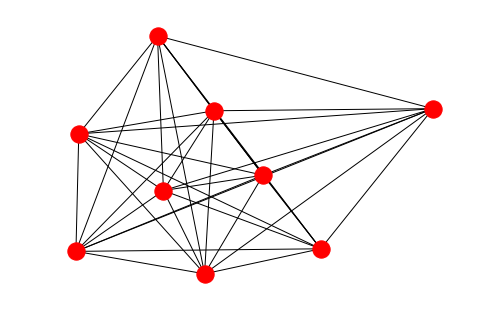

In [200]:
nx.draw(G)